# 1. K-최접근 이웃 알고리즘

- 전체 데이터를 메모리에 가지고 있음
- 이웃해 있는 데이터들 중에서 가장 가까운 K개의 데이터를 찾아서 분류하는 알고리즘

## 1) 패키지 임포트 + 한글 폰트 설정

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Matplotlib의 전역 폰트 설정
plt.rc('font', family='Pretendard')

# 마이너스 부호가 깨지는 현상 방지
plt.rc('axes', unicode_minus=False)


## 2) 데이터 세팅

In [8]:
### 도미 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [9]:
### 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

## 3) 산점도로 데이터 시각화

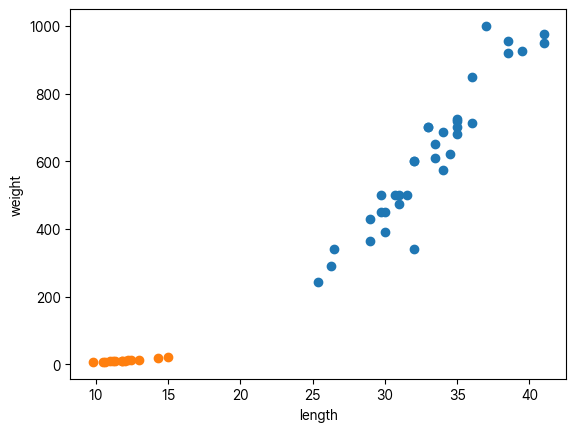

In [10]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 4) 데이터 합치기
- length : 도미 길이 + 빙어 길이
- weight : 도미 무게 + 빙어 무게
- [길이, 무게] 형태로 변경
- 정답 데이터 추가 : 1(도미), 0(빙어)


In [11]:
legth = bream_length + smelt_length
weight = bream_weight + smelt_weight

- [길이, 무게] 형태로 변경

In [12]:
fish_data = [[l, w] for l, w in zip(legth, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


- 정답 데이터 생성 35번째까지 1(도미), 36번째부터 49번째까지 0(빙어)

In [13]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 5) K-최접근 이웃 알고리즘 모델 생성

In [15]:
### 객체 생성
kn = KNeighborsClassifier()

- fit : 사이킷런 모델 훈련 매서드
- predict : 사이킷런 모델 예측 매서드
- score : 사이킷런 모델 평가 매서드

In [17]:
### 모델 훈련
kn.fit(fish_data, fish_target)

### 모델 평가 : 1에 가까울 수록 정확
kn.score(fish_data, fish_target)  # 정확도 평가

1.0

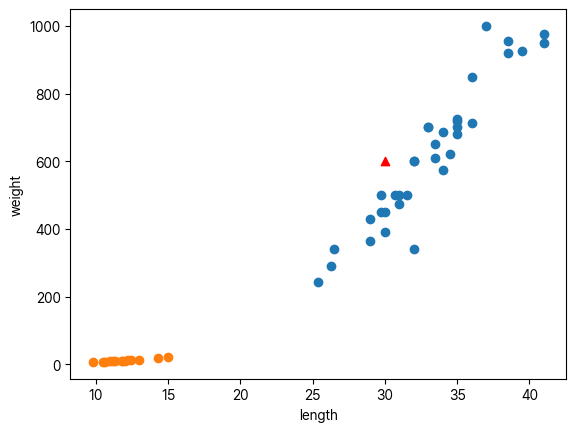

In [18]:
### 시각화
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^', color='red')  # 예측할 데이터
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
### 예측 시행  - 넘파이 배열로 받음
### 리턴값 : 어느 클래스인지
kn.predict([[30, 600]])

array([1])

### cf) 참고 대상이 더 늘어나면 K-최접근 이웃 알고리즘은 부정확해짐
- 디폴트 : 5개
- n_neighbors : K값을 조정할 수 있음

In [24]:
### 객체 생성
kn49 = KNeighborsClassifier(n_neighbors=49)

### 모델 훈련
kn49.fit(fish_data, fish_target)

### 모델 평가 : 1에 가까울 수록 정확
print("모델 평가 : ", kn49.score(fish_data, fish_target))  # 정확도 평가

### 모든 데이터 수만큼 참고했음 > 부정확해짐
print("35/49 : ",35/49)  # 정확도

모델 평가 :  0.7142857142857143
35/49 :  0.7142857142857143
